# Crossing moving averages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

In [3]:
df = df[-1_000_000:]

In [4]:
fast_window = 500
slow_window = 1000

df0 = (pd.DataFrame()
            .assign(price=df.close)
            .assign(fast=df.close.ewm(fast_window).mean())
            .assign(slow=df.close.ewm(slow_window).mean()))
df0

,price,fast,slow
time,,,
2021-04-23 06:55:23.894,48800.00,48800.000000,48800.000000
2021-04-23 06:55:23.895,48800.00,48800.000000,48800.000000
2021-04-23 06:55:23.898,48800.00,48800.000000,48800.000000
2021-04-23 06:55:25.319,48795.23,48798.803924,48798.805712
2021-04-23 06:55:29.496,48814.42,48801.939632,48801.934815
...,...,...,...
2021-06-19 16:27:04.502,35841.54,36014.674456,35996.872080
2021-06-19 16:27:20.667,35823.32,36014.292511,35996.698702
2021-06-19 16:27:26.627,35826.83,36013.918335,35996.529003


In [5]:
def get_up_cross(df):
    crit1 = df.fast.shift(1) < df.slow.shift(1)
    crit2 = df.fast > df.slow
    return df.price[(crit1) & (crit2)]

def get_down_cross(df):
    crit1 = df.fast.shift(1) > df.slow.shift(1)
    crit2 = df.fast < df.slow
    return df.price[(crit1) & (crit2)]

up = get_up_cross(df0)
down = get_down_cross(df0)

In [6]:
side_up = pd.Series(1, index=up.index)
side_down = pd.Series(-1, index=down.index)
side = pd.concat([side_up,side_down]).sort_index()
side

time
2021-04-23 06:55:29.496    1
2021-04-23 06:56:21.624   -1
2021-04-23 06:56:25.622    1
2021-04-23 07:04:35.993   -1
2021-04-23 07:09:59.267    1
                          ..
2021-06-18 23:39:17.065    1
2021-06-19 03:03:18.657   -1
2021-06-19 05:48:24.679    1
2021-06-19 13:12:05.263   -1
2021-06-19 14:22:57.287    1
Length: 427, dtype: int64

In [7]:
side.to_csv("../data/side.csv")

## Plotting

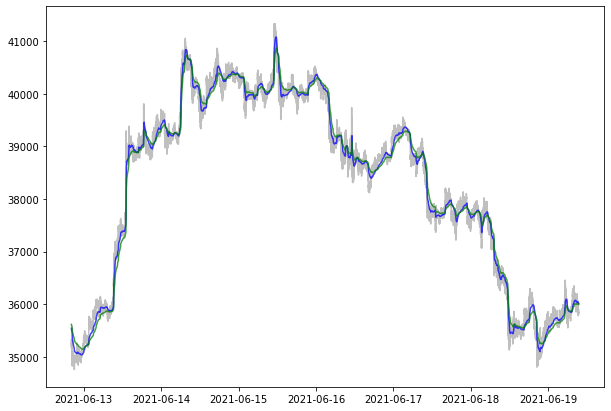

In [24]:
plot = df0[-100_000:]
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(plot.price, color="gray", alpha=.5)
ax.plot(plot.fast, color="blue", alpha=.75)
ax.plot(plot.slow, color="green", alpha=.75)

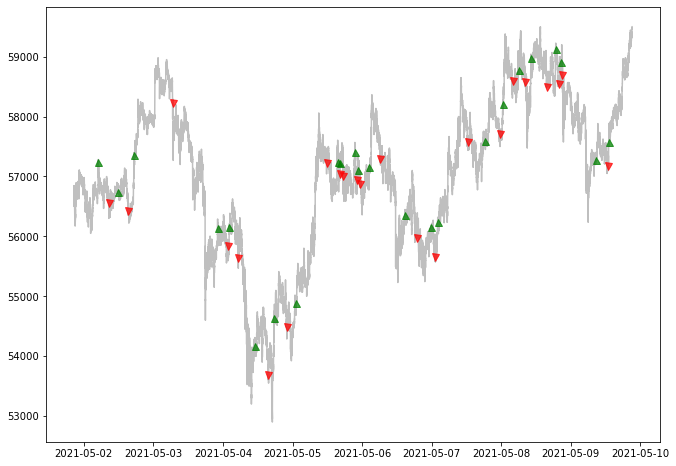

In [25]:
plot = df0
plot["up"] = up
plot["down"] = down
plot = plot[-900_000:-800_000]

fig, ax = plt.subplots(figsize=(11,8))

# close_df.loc['2014':].plot(ax=ax, alpha=.5)
ax.plot(plot.price, alpha=.5, color="gray")

ax.plot(plot.up, marker='^', markersize=7,
                     alpha=0.75, label='upcross', color='g')

ax.plot(plot.down, marker='v', markersize=7,
                     alpha=0.75, label='upcross', color='r')




In [24]:
up.index[1]

Timestamp('2021-01-08 20:22:46.714000')

In [26]:
df.loc[up.index[1]]

open      40000.030000
high      40020.590000
low       40000.030000
close     40020.430000
volume        2.508191
Name: 2021-01-08 20:22:46.714000, dtype: float64